# Dependencies

In [1]:
import pandas as pd
import numpy as np
import json
import re
from nltk.corpus import stopwords
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Importing and Cleaning Data

In [2]:
df = pd.read_json("Data_cyb.json", lines = True, orient = "columns")

In [3]:
rating = []

for i in df["annotation"]:
    rating.append(int(i["label"][0]))
    
df["rating"] = rating

In [4]:
df.head()

,content,annotation,extras,rating
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [5]:
tweets = pd.read_csv("Test_Twitter_Comments.csv")
tweets.tail()

,content,rating
96,That is someone who does it from their heart. ...,1
97,Absolutely applaud your work to secure freedom...,0
98,You'll never learn it till you actually live i...,1
99,Nothing on the reinstatement of federal Capito...,1
100,Crickets,0


In [6]:
new_df1 = df[["content", "rating"]]

In [7]:
new_df = pd.concat([new_df1,tweets])

In [8]:
X, X_test, y, y_test = train_test_split(new_df["content"], new_df["rating"], train_size = 0.8)


In [9]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(X)
reviews_test_clean = preprocess_reviews(X_test)

# Logistic Regression

## Baseline Logistic Regression

In [10]:
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(reviews_train_clean)
X_baseline = baseline_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X_baseline, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6799303655807013
Accuracy for C=0.05: 0.719224073613529
Accuracy for C=0.25: 0.7716985824421786
Accuracy for C=0.5: 0.7940810743596121
Accuracy for C=1: 0.8104949017657299


### Has room to learn

## Logistic Regression, Removal Stop Words

In [11]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

In [12]:
no_stop_words_train = remove_stop_words(reviews_train_clean)

cv = CountVectorizer(binary=True)
cv.fit(no_stop_words_train)
X = cv.transform(no_stop_words_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6694852026858991
Accuracy for C=0.05: 0.715991047003233
Accuracy for C=0.25: 0.7684655558318826
Accuracy for C=0.5: 0.7831385227555334
Accuracy for C=1: 0.8010445162894803


### Still has room to learn

## Logistic Regression, Stemming

In [13]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews_train = get_stemmed_text(reviews_train_clean)

cv = CountVectorizer(binary=True)
cv.fit(stemmed_reviews_train)
X = cv.transform(stemmed_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6622730664013927
Accuracy for C=0.05: 0.7065406615269834
Accuracy for C=0.25: 0.763989057448396
Accuracy for C=0.5: 0.7846306888833623
Accuracy for C=1: 0.8010445162894803


### Still has room to learn

## Logistic Regression, Lemmatization

In [14]:
def get_lemmatized_text(corpus):
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews_train = get_lemmatized_text(reviews_train_clean)

cv = CountVectorizer(binary=True)
cv.fit(lemmatized_reviews_train)
X = cv.transform(lemmatized_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6754538671972147
Accuracy for C=0.05: 0.7177319074857
Accuracy for C=0.25: 0.7632429743844815
Accuracy for C=0.5: 0.7831385227555334
Accuracy for C=1: 0.8025366824173091


### Still has room to learn

## Logistic Regression, Word Count

In [15]:
wc_vectorizer = CountVectorizer(binary=False)
wc_vectorizer.fit(reviews_train_clean)
X = wc_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6749564784879383
Accuracy for C=0.05: 0.7130067147475753
Accuracy for C=0.25: 0.7699577219597115
Accuracy for C=0.5: 0.7898532703307635
Accuracy for C=1: 0.8047749316090524


### Still has room to learn

## Logistic Regression, N-grams

### 2-grams

In [16]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6903755284755037
Accuracy for C=0.05: 0.7712011937329023
Accuracy for C=0.25: 0.8418303904501367
Accuracy for C=0.5: 0.8535190251181298
Accuracy for C=1: 0.8565033573737876


### 3-grams

In [17]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.720964934095996
Accuracy for C=0.05: 0.8139766227306641
Accuracy for C=0.25: 0.8642128823675702
Accuracy for C=0.5: 0.8694354638149714
Accuracy for C=1: 0.8724197960706292


### 4-grams

In [18]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.7306640139268838
Accuracy for C=0.05: 0.8259139517532952
Accuracy for C=0.25: 0.8619746331758269
Accuracy for C=0.5: 0.8617259388211888
Accuracy for C=1: 0.8627207162397413


### Still has room to learn

# Support Vector Machines (SVM)

In [19]:
from sklearn.svm import LinearSVC

## SVM, Removal of Stop Words

In [20]:
no_stop_words_train = remove_stop_words(reviews_train_clean)

cv = CountVectorizer(binary=True)
cv.fit(no_stop_words_train)
X = cv.transform(no_stop_words_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

## SVM, Stemming

In [21]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews_train = get_stemmed_text(reviews_train_clean)

cv = CountVectorizer(binary=True)
cv.fit(stemmed_reviews_train)
X = cv.transform(stemmed_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

## SVM, Lemmatization

In [22]:
def get_lemmatized_text(corpus):
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews_train = get_lemmatized_text(reviews_train_clean)

cv = CountVectorizer(binary=True)
cv.fit(lemmatized_reviews_train)
X = cv.transform(lemmatized_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

## SVM, Word Count

In [23]:
wc_vectorizer = CountVectorizer(binary=False)
wc_vectorizer.fit(reviews_train_clean)
X = wc_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

## SVM, N-Grams

### n = 2

In [24]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.8142253170853022
Accuracy for C=0.05: 0.8642128823675702
Accuracy for C=0.25: 0.865456354140761
Accuracy for C=0.5: 0.8637154936582939
Accuracy for C=1: 0.8589903009201691


### n = 3

In [25]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.8269087291718478
Accuracy for C=0.05: 0.8612285501119125
Accuracy for C=0.25: 0.8560059686645113
Accuracy for C=0.5: 0.8512807759263865
Accuracy for C=1: 0.8463068888336235


### n = 4

In [26]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.8612285501119125
Accuracy for C=0.05: 0.8793832380004973
Accuracy for C=0.25: 0.8706789355881621
Accuracy for C=0.5: 0.8691867694603332
Accuracy for C=1: 0.8624720218851032


### Based on the comparison between the combination of the various vectorization with logistic rergression and SVM, 4-gram vectorization with SVM seemed stablize with the greatest accuracy. We later, however, sought to see if stemming, lemmatization, and/or the removal of stop words would improve the model.

## SVM, 4-grams, Stemming

In [27]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4))
ngram_vectorizer.fit(stemmed_reviews_train)
X = ngram_vectorizer.transform(stemmed_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.855508579955235
Accuracy for C=0.05: 0.8729171847799055
Accuracy for C=0.25: 0.865456354140761
Accuracy for C=0.5: 0.8609798557572743
Accuracy for C=1: 0.8560059686645113


## SVM, 4-grams, Lemmatization

In [28]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4))
ngram_vectorizer.fit(lemmatized_reviews_train)
X = ngram_vectorizer.transform(lemmatized_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.8599850783387217
Accuracy for C=0.05: 0.8724197960706292
Accuracy for C=0.25: 0.8619746331758269
Accuracy for C=0.5: 0.8594876896294454
Accuracy for C=1: 0.853767719472768


## SVM, 4-grams, Stemming, Removal of stop words

In [29]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [30]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4), stop_words=stop_words)
ngram_vectorizer.fit(stemmed_reviews_train)
X = ngram_vectorizer.transform(stemmed_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.8353643372295448
Accuracy for C=0.05: 0.8627207162397413
Accuracy for C=0.25: 0.8594876896294454
Accuracy for C=0.5: 0.8540164138274061
Accuracy for C=1: 0.8473016662521761


## SVM, 4-grams, Lemmatization, Removal of stop words

In [31]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4), stop_words=stop_words)
ngram_vectorizer.fit(lemmatized_reviews_train)
X = ngram_vectorizer.transform(lemmatized_reviews_train)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.8216861477244467
Accuracy for C=0.05: 0.8607311614026362
Accuracy for C=0.25: 0.8505346928624721
Accuracy for C=0.5: 0.8468042775428998
Accuracy for C=1: 0.8385973638398408


# Polishing the Model

In [36]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

ccc = []
c_scores = []

for c in np.arange(0.01, 0.1, 0.01):
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))
    ccc.append(c)
    c_scores.append(accuracy_score(y_val, svm.predict(X_val)))   

Accuracy for C=0.01: 0.8565033573737876
Accuracy for C=0.02: 0.8662024372046755
Accuracy for C=0.03: 0.8699328525242477
Accuracy for C=0.04: 0.8714250186520766
Accuracy for C=0.05: 0.8746580452623726
Accuracy for C=0.060000000000000005: 0.8731658791345437
Accuracy for C=0.06999999999999999: 0.8729171847799055
Accuracy for C=0.08: 0.8729171847799055
Accuracy for C=0.09: 0.8734145734891818


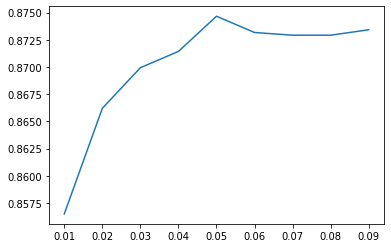

In [37]:
import matplotlib.pyplot as plt    
                    
plt.plot(ccc, c_scores)
plt.show()

# Final Model - SVM, 4-grams, C = 5

# Let's test this baby out!

In [38]:
final = LinearSVC(tol=.000001,C=0.05)
final.fit(X, y)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final.predict(X_test)))

Final Accuracy: 0.9166873911962199
